# **Final Exam for Deep Network Development course. First part (mandatory)**

This notebook contains the task to be solved in order to pass the exam.
This is the first part of the exam, which is compolsury in order to get a grade. It contains a task similar to what you have worked on during the semester, which consists on implementing a network architecture and a function.

Please note that, to **PASS** the Deep Network Development course you must **SUBMIT A SUCCESSFUL SOLUTION FOR THE FIRST PART**. If you **FAIL** the first part, you have the right to do the exam **ONE MORE TIME**. If you **FAIL AGAIN**, then unfortunately, you have failed the course. If you **PASS** the first part, then you get the weighted average of your quizzes and assignments as your final grade.

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 08/06/2023 9AM-10AM

## Task Description

#### Your task is to implement a custom architecture inspired by a image-to-text model, and the forward function. The model receives an image as input and generates text as output.

#### Afterwards, make sure to run cell code number 1.2. to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

In [ ]:
import torch
from torch import nn
from torchvision import models
from torchsummary import summary

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #make sure that you are using GPU acceleration
#device

## 1. Architecture

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model / architecture. You will not find it on the internet.

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/118X5Xamx8b6UzmFBcTTkAiUjmbDshu9n/view?usp=share_link

<br>
<br>

![](https://drive.google.com/uc?export=view&id=118X5Xamx8b6UzmFBcTTkAiUjmbDshu9n)

#### Input image

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

response = requests.get("https://cdn.openai.com/dall-e-2/demos/text2im/teddy_bears/mad_scientists/saturday-morning-cartoon/0.jpg")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((256, 256))
image = np.rollaxis(np.array(image), 2, 0)

In [ ]:
image.shape

(3, 256, 256)

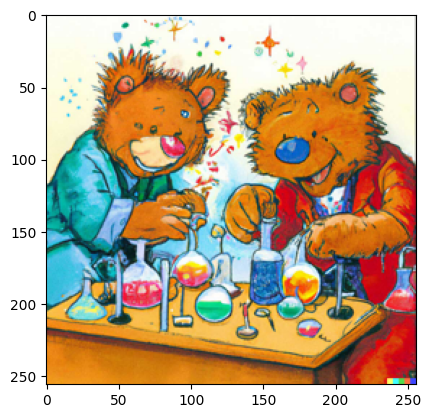

In [ ]:
plt.imshow(np.moveaxis(image, 0,-1))

In [ ]:
#Simple pre-processing
input_image = torch.from_numpy(image)
input_image = torch.unsqueeze(input_image, dim=0)
input_image.size()

torch.Size([1, 3, 256, 256])

#### 1.1. Implement the architecture

In [ ]:
class ImageToText(nn.Module):
    def __init__(self):
        super(ImageToText, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding='valid')
        self.conv2a = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding='same')
        self.conv2b = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(1, 1), stride=(1, 1), padding='same')
        self.conv2c = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding='same')
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(5, 5), stride=(4, 4), padding=1)

        self.batch_norm = nn.BatchNorm2d(num_features=256)

        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(5, 5), stride=(1, 1), padding='same')

        self.lstm = nn.LSTM(input_size=256*32*32, hidden_size=128)

        self.fc_out = nn.Linear(in_features=128, out_features=13)
        self.sigmoid = nn.Sigmoid()


    def forward(self, image):
        batch_size = image.size(0)

        features = self.conv1(image)
        print("conv1", features.shape)

        conv2a = self.conv2a(features)
        print("conv2a",conv2a.shape)
        conv2b = self.conv2b(features)
        print("conv2b",conv2b.shape)
        conv2c = self.conv2c(features)
        print("conv2c",conv2c.shape)

        combined = torch.cat((conv2a,conv2b,conv2c), dim=1)
        print("combined", combined.shape)

        combined = self.conv3(combined)
        print("conv3", combined.shape)

        norm = self.batch_norm(combined)
        print("norm", norm.shape)

        conv4 = self.conv4(norm)
        print("conv4", conv4.shape)

        features = conv4 + combined
        print("add", features.shape)

        features = features.view(1, batch_size, 256*32*32)
        print("flatten",features.shape)

        out, hidden_lstm = self.lstm(features)
        print("lstm", out.shape)

        out = self.fc_out(out)
        print("fc", out.shape)
        predictions = self.sigmoid(out)
        print("sig",predictions.shape)

        return predictions #rename your last output as predictions, or change the name here

#### 1.2. Test your implementation
Expected output

torch.Size( [1, 1, 13] )

In [ ]:
imagetotext = ImageToText()

output = imagetotext(input_image.float())

output.size()

conv1 torch.Size([1, 128, 127, 127])
conv2a torch.Size([1, 128, 127, 127])
conv2b torch.Size([1, 64, 127, 127])
conv2c torch.Size([1, 64, 127, 127])
combined torch.Size([1, 256, 127, 127])
conv3 torch.Size([1, 256, 32, 32])
norm torch.Size([1, 256, 32, 32])
conv4 torch.Size([1, 256, 32, 32])
add torch.Size([1, 256, 32, 32])
flatten torch.Size([1, 1, 262144])
lstm torch.Size([1, 1, 128])
fc torch.Size([1, 1, 13])
sig torch.Size([1, 1, 13])


torch.Size([1, 1, 13])

## Solution

In [ ]:
class ImageToText(nn.Module):
    def __init__(self):
        super(ImageToText, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding='valid')
        self.conv2a = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding='same')
        self.conv2b = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(1, 1), stride=(1, 1), padding='same')
        self.conv2c = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding='same')
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(5, 5), stride=(4, 4), padding=1)

        self.batch_norm = nn.BatchNorm2d(num_features=256)

        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(5, 5), stride=(1, 1), padding='same')

        self.lstm = nn.LSTM(input_size=256*32*32, hidden_size=128)

        self.fc_out = nn.Linear(in_features=128, out_features=13)
        self.sigmoid = nn.Sigmoid()


    def forward(self, image):
        batch_size = image.size(0)

        features = self.conv1(image)
        print("conv1", features.shape)

        conv2a = self.conv2a(features)
        print("conv2a",conv2a.shape)
        conv2b = self.conv2b(features)
        print("conv2b",conv2b.shape)
        conv2c = self.conv2c(features)
        print("conv2c",conv2c.shape)

        combined = torch.cat((conv2a,conv2b,conv2c), dim=1)
        print("combined", combined.shape)

        combined = self.conv3(combined)
        print("conv3", combined.shape)

        norm = self.batch_norm(combined)
        print("norm", norm.shape)

        conv4 = self.conv4(norm)
        print("conv4", conv4.shape)

        features = conv4 + combined
        print("add", features.shape)

        features = features.view(1, batch_size, 256*32*32)
        print("flatten",features.shape)

        out, hidden_lstm = self.lstm(features)
        print("lstm", out.shape)

        out = self.fc_out(out)
        print("fc", out.shape)
        predictions = self.sigmoid(out)
        print("sig",predictions.shape)

        return predictions #rename your last output as predictions, or change the name here